# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

Нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# Описание данных

Данные для работы находятся в нескольких таблицах. Нажмите на название файла, чтобы его скачать.

[`market_file.csv`](https://code.s3.yandex.net/datasets/market_file.csv)

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

[`market_money.csv`](https://code.s3.yandex.net/datasets/market_money.csv)

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, `'текущий_месяц'` или `'предыдущий_месяц'`.
- `Выручка` — сумма выручки за период.

[`market_time.csv`](https://code.s3.yandex.net/datasets/market_time.csv)

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

[`money.csv`](https://code.s3.yandex.net/datasets/money.csv)

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

# 1. Загрузка данных

In [1]:
!pip install --upgrade scikit-learn

In [2]:
!pip install matplotlib==3.7.3

  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install shap
!pip freeze | grep shap

  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.3.0 requires numpy>=1.23, but you have numpy 1.22.4 which is incompatible.
shap==0.46.0


In [4]:
# загрузим все библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

In [5]:
print(sklearn.__version__)

1.5.1


In [6]:
# загрузим файлы и заменим на нужные разделители

df_market = pd.read_csv('/datasets/market_file.csv')
df_m_money = pd.read_csv('/datasets/market_money.csv')
df_time = pd.read_csv('/datasets/market_time.csv')
df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',') # только здесь обнаружили проблему с записью данных

In [7]:
# изучим данные market
df_market.info()
df_market.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [8]:
# изучим данные market_money
df_m_money.info()
df_m_money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

In [9]:
# изучим данные time
df_time.info()
df_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [10]:
# изучим данные money
df_money.info()
df_money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

**Вывод:** Мы загрузили данные из четырех файлов. Просомтрели их и исправили в файле **money** запись данных. Так же можно заметить, что данные в **market_money, time и money** находятся данные, которые имеют шаг в 1300. Скорее всего это данные о 1300 покупателей, которые в имеются в одном файле данные за 2 месяца, в другом за 3.

# 2. Предобработка данных

In [11]:
# явных дубликатов не обнаружено, пропусков тоже
# типы данных соответствуют верным 
# проверим уникальные значения в ячейках с типом данных object

print('Количество дубликатов:', df_market.duplicated().sum())
print(df_market['Покупательская активность'].unique())
print(df_market['Тип сервиса'].unique()) # обнаружена проблема написания "стандартт" с двумя Т. Нужно исправить
print(df_market['Разрешить сообщать'].unique())
print(df_market['Популярная_категория'].unique()) # обнаружена опечатка в "Комсетика и аксесуары", но пока не знаем нужно ли это исправлять

Количество дубликатов: 0
['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [12]:
# явных дубликатов не обнаружено, пропусков тоже
# типы данных соответствуют верным 
# проверим уникальные значения в ячейках с типом данных object

print('Количество дубликатов:', df_m_money.duplicated().sum())
print(df_m_money['Период'].unique())

Количество дубликатов: 0
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [13]:
# явных дубликатов не обнаружено, пропусков тоже
# типы данных соответствуют верным 
# проверим уникальные значения в ячейках с типом данных object

print('Количество дубликатов:', df_time.duplicated().sum())
print(df_time['Период'].unique()) # обнаржена опечатка в слове "предыдцщий_месяц" нужно исрпавить

Количество дубликатов: 0
['текущий_месяц' 'предыдцщий_месяц']


In [14]:
# явных дубликатов не обнаружено, пропусков тоже
# типы данных соответствуют верным 

print('Количество дубликатов:', df_money.duplicated().sum())

Количество дубликатов: 0


В данных были обнаружены опечатки, исправим их и сделаем более лаконичные значения.

In [15]:
# Переимнуем столбцы в более удробное написание и немного сократим длинные названия
# Исправим грамматические ошибки в данных

df_market = df_market.rename(columns={'Маркет_актив_6_мес': 'Маркетинг за 6 мес.',
                                     'Маркет_актив_тек_мес': 'Маркетинг в текущем мес.',
                                      'Акционные_покупки': 'Акционные покупки',
                                     'Популярная_категория': 'Популярная категория',
                                     'Средний_просмотр_категорий_за_визит': 'Кол-во категорий за визит',
                                     'Неоплаченные_продукты_штук_квартал': 'Неоплаченные продукты за квартал',
                                     'Ошибка_сервиса': 'Ошибка сервиса',
                                     'Страниц_за_визит': 'Кол-во страниц за визит'})

df_market['Тип сервиса'] = df_market['Тип сервиса'].str.replace('стандартт', 'стандарт')
df_market['Популярная категория'] = df_market['Популярная категория'].str.replace(
    'Косметика и аксесуары', 'Косметика и аксессуары')

df_time = df_time.rename(columns={'минут': 'Минуты'})
df_time['Период'] = df_time['Период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

**Вывод:** Проверили данные на наличие дубликатов и корректность написания информации. Дубликатов не обнаружено, но нашлись опечатки в данных. Исправиили их и сделали запись данных более лаконичными.

# 3. Исследовательский анализ данных

Проведем исследовательский анализ данных в каждой таблице.

In [16]:
df_market.describe()

id  Маркетинг за 6 мес.  Маркетинг в текущем мес.  \
count    1300.000000          1300.000000               1300.000000   
mean   215997.500000             4.253769                  4.011538   
std       375.421985             1.014814                  0.696868   
min    215348.000000             0.900000                  3.000000   
25%    215672.750000             3.700000                  4.000000   
50%    215997.500000             4.200000                  4.000000   
75%    216322.250000             4.900000                  4.000000   
max    216647.000000             6.600000                  5.000000   

       Длительность  Акционные покупки  Кол-во категорий за визит  \
count   1300.000000        1300.000000                 1300.00000   
mean     601.898462           0.319808                    3.27000   
std      249.856289           0.249843                    1.35535   
min      110.000000           0.000000                    1.00000   
25%      405.500000           0.170000                    2.00000   
50%      606.000000           0.240000                    3.00000   
75%      806.000000           0.300000                    4.00000   
max     1079.000000           0.990000                    6.00000   

       Неоплаченные продукты за квартал  Ошибка сервиса  \
count                       1300.000000     1300.000000   
mean                           2.840000        4.185385   
std                            1.971451        1.955298   
min                            0.000000        0.000000   
25%                            1.000000        3.000000   
50%                            3.000000        4.000000   
75%                            4.000000        6.000000   
max                           10.000000        9.000000   

       Кол-во страниц за визит  
count              1300.000000  
mean                  8.176923  
std                   3.978126  
min                   1.000000  
25%                   5.000000  
50%                   8.000000  
75%                  11.000000  
max                  20.000000

Построим графики для анализа данных

**Графики взаимодействия пользователя с сайтом**

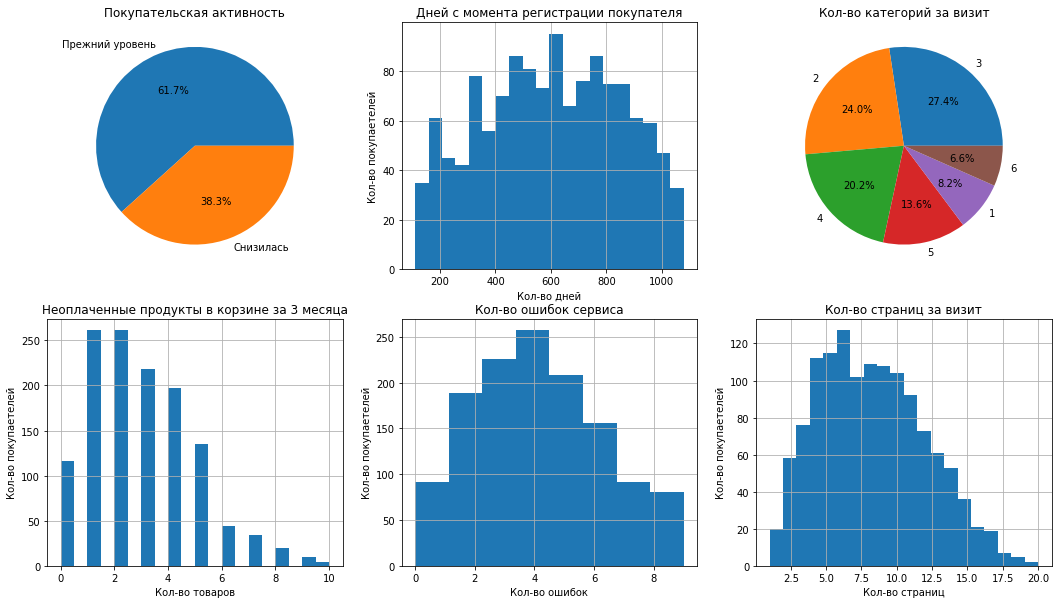

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

buy_count = df_market['Покупательская активность'].value_counts()
axs[0, 0].pie(buy_count, labels=buy_count.index, autopct='%1.1f%%')
axs[0, 0].set_title('Покупательская активность')

df_market['Длительность'].hist(bins=20, ax=axs[0, 1])
axs[0, 1].set_title('Дней с момента регистрации покупателя')
axs[0, 1].set_xlabel('Кол-во дней')
axs[0, 1].set_ylabel('Кол-во покупаетелей')

category_count = df_market['Кол-во категорий за визит'].value_counts()
axs[0, 2].pie(category_count, labels=category_count.index, autopct='%1.1f%%')
axs[0, 2].set_title('Кол-во категорий за визит')

df_market['Неоплаченные продукты за квартал'].hist(bins=20, ax=axs[1, 0])
axs[1, 0].set_title('Неоплаченные продукты в корзине за 3 месяца')
axs[1, 0].set_xlabel('Кол-во товаров')
axs[1, 0].set_ylabel('Кол-во покупаетелей')

df_market['Ошибка сервиса'].hist(bins=8, ax=axs[1, 1])
axs[1, 1].set_title('Кол-во ошибок сервиса')
axs[1, 1].set_xlabel('Кол-во ошибок')
axs[1, 1].set_ylabel('Кол-во покупаетелей')

df_market['Кол-во страниц за визит'].hist(bins=20, ax=axs[1, 2])
axs[1, 2].set_title('Кол-во страниц за визит')
axs[1, 2].set_xlabel('Кол-во страниц')
axs[1, 2].set_ylabel('Кол-во покупаетелей')

plt.show()

После построения графиков взаимодействия пользователей с сайтом мы заметили, что:
1. Снижение активность отслеживается у **38,3%** покупателей;
2. Самое большое количество покуаетлей, которые зарегистрировались на сайте примерно **600 дней** назад;
3. Набольшие кол-во категорий просматриваемых на сайте - **3 страницы (27,4%), 2 страницы (24%) и 4 страницы (20,2%)**;
4. Неоплаченные продукты в корзине за 3 месяца в среднем около **3**;
5. Кол-во оишбок сервиса, с которым сталкивается полкупатель чаще всего около **4**;
6. Покупатели чаще всего просматривает около **6 страниц за визит**.

**Графики продуктового поведения покупателей**

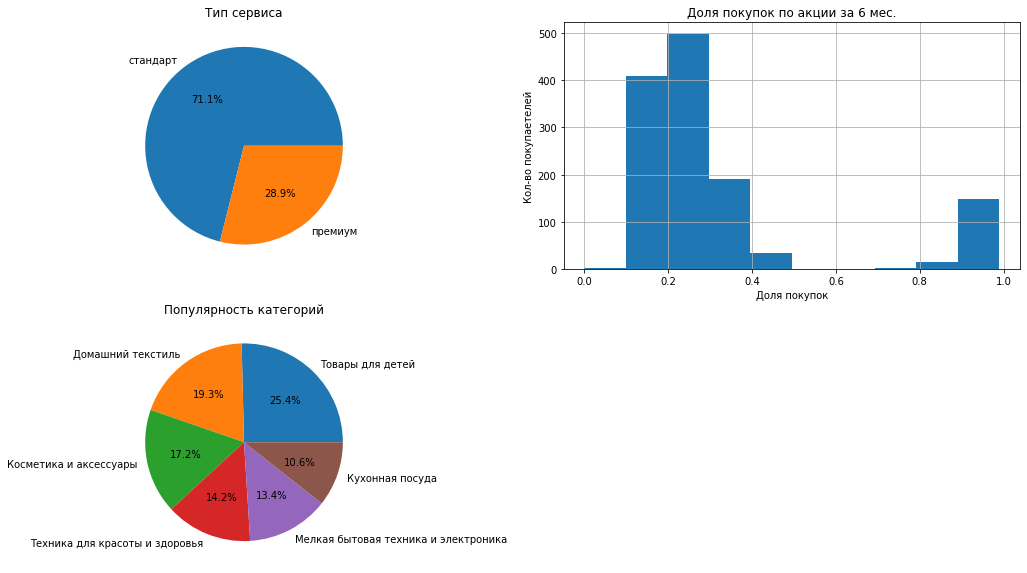

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

type_count = df_market['Тип сервиса'].value_counts()
axs[0, 0].pie(type_count, labels=type_count.index, autopct='%1.1f%%')
axs[0, 0].set_title('Тип сервиса')

df_market['Акционные покупки'].hist(bins=10, ax=axs[0, 1])
axs[0, 1].set_title('Доля покупок по акции за 6 мес.')
axs[0, 1].set_xlabel('Доля покупок')
axs[0, 1].set_ylabel('Кол-во покупаетелей')

popular_count = df_market['Популярная категория'].value_counts()
axs[1, 0].pie(popular_count, labels=popular_count.index, autopct='%1.1f%%')
axs[1, 0].set_title('Популярность категорий')

fig.delaxes(axs[1, 1])

После построения графиков продуктового поведения покупателей мы заметили, что:
1. Покупателей с подпиской **стандарт - 71,1%**, а с подпиской **премиум - 28,9%**;
2. Самое большое колчиество покупаетелей покупающие акционные продукты около **20-30%**;
3. Самая попоулярная категория товаров - **Товары для детей (25,4%), Домашний текстиль (19,3%), Косметика и аксессуары (17,2%)**.

**Графики комммуникации с покупателями**

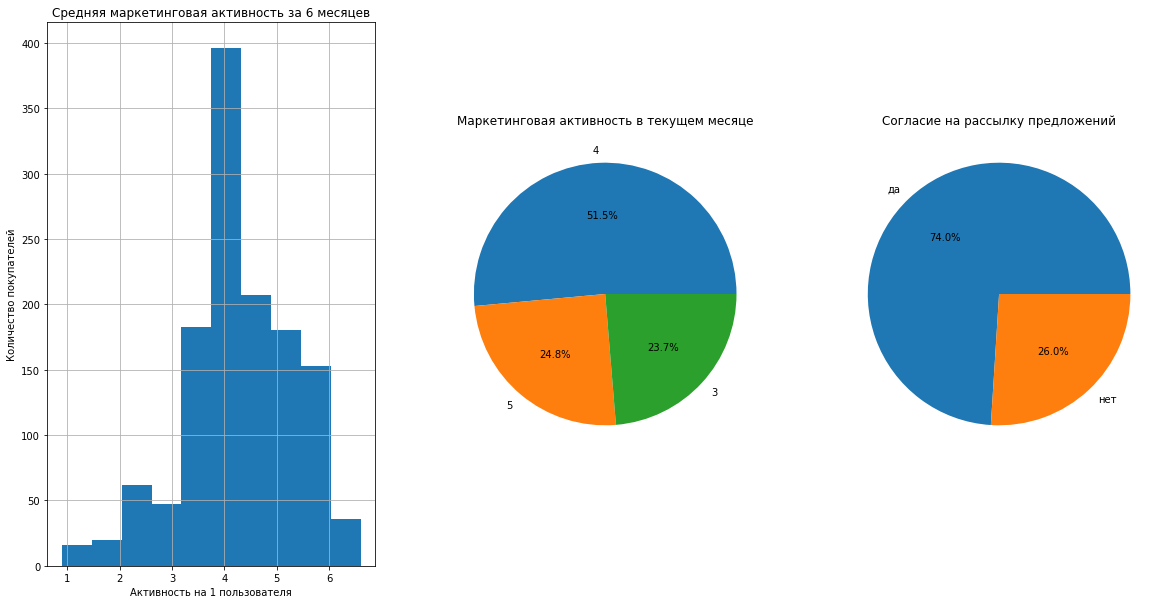

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

df_market['Маркетинг за 6 мес.'].hist(bins=10, ax=axs[0])
axs[0].set_title('Средняя маркетинговая активность за 6 месяцев')
axs[0].set_xlabel('Активность на 1 пользователя')
axs[0].set_ylabel('Количество покупателей')

marketing_count = df_market['Маркетинг в текущем мес.'].value_counts()
axs[1].pie(marketing_count, labels=marketing_count.index, autopct='%1.1f%%')
axs[1].set_title('Маркетинговая активность в текущем месяце')

agree_count = df_market['Разрешить сообщать'].value_counts()
axs[2].pie(agree_count, labels=agree_count.index, autopct='%1.1f%%')
axs[2].set_title('Согласие на рассылку предложений')

plt.show()

После построения графиков комммуникации с покупателями мы заметили, что:
1. За последние 3 месяца, чаще всего маркетинговые активности делали **4 раза на 1 пользователя**;
2. Макретинговая активность за текущий месяц составляет также **4 раза у 51,5% пользователей**;
3. Согласие на рассылку предложений дали **74% пользователей**;

Исследуем данные из df_m_money

In [20]:
df_m_money.describe()

id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

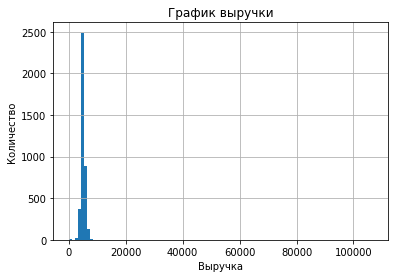

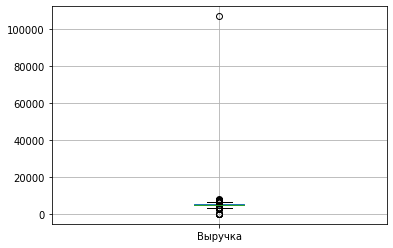

In [21]:
df_m_money['Выручка'].hist(bins=100)
plt.title('График выручки')
plt.xlabel('Выручка')
plt.ylabel('Количество')
plt.show()

df_m_money.boxplot('Выручка');
plt.show() # похоже на выброс

По графику видно, что присуствуют выбросы. Изучим их.

In [22]:
df_m_money[df_m_money['Выручка'] > 10000] # найдем строки с выбросами

id         Период   Выручка
98  215380  текущий_месяц  106862.2

Найден 1 выброс. Так как удаление модет навредить данным, возьмем средние показателя пользователя за 2 месяца и доабвим его

In [23]:
df_m_money[df_m_money['id'] == 215380]

id               Период   Выручка
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2

In [24]:
# добавим среднее число в ячейку с выбросом
value1 = df_m_money.at[96, 'Выручка']
value2 = df_m_money.at[97, 'Выручка']
value3 = (value1 + value2) / 2

df_m_money.at[98, 'Выручка'] = value3

Исправили выброс, теперь построим график еще раз

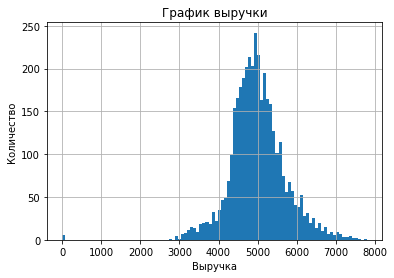

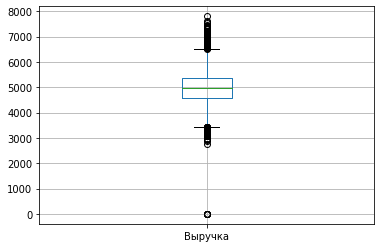

In [25]:
df_m_money['Выручка'].hist(bins=100)
plt.title('График выручки')
plt.xlabel('Выручка')
plt.ylabel('Количество')
plt.show()

df_m_money.boxplot('Выручка');
plt.show()

In [26]:
df_m_money[df_m_money['Выручка'] < 1000] 

id               Период  Выручка
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

График имеет нормально распределение с небольшим количеством выбросов у 0, но оставим этим данные, так как такое может быть.

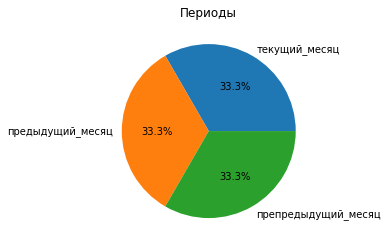

In [27]:
period_money = df_m_money['Период'].value_counts()
plt.pie(period_money, labels=period_money.index, autopct='%1.1f%%')
plt.title('Периоды');

Данные по месяца распределены равномерно

Исследуем данные файла df_time

In [28]:
df_time.describe()

id       Минуты
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

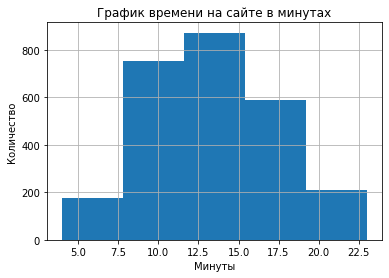

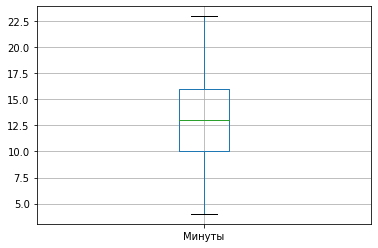

In [29]:
df_time['Минуты'].hist(bins=5)
plt.title('График времени на сайте в минутах')
plt.xlabel('Минуты')
plt.ylabel('Количество')
plt.show()

df_time.boxplot('Минуты');
plt.show() 

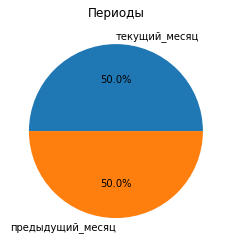

In [30]:
period_time = df_time['Период'].value_counts()
plt.pie(period_time, labels=period_time.index, autopct='%1.1f%%')
plt.title('Периоды');

Исследуем данные файла df_money

In [31]:
df_money.describe()

id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

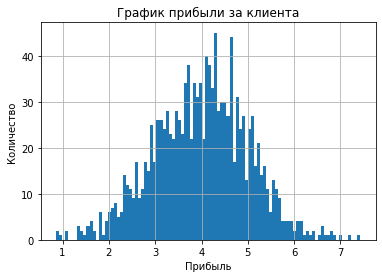

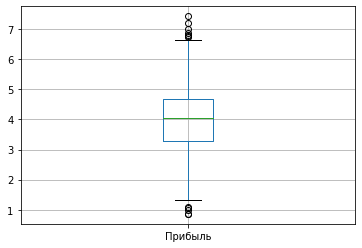

In [32]:
df_money['Прибыль'].hist(bins=100)
plt.title('График прибыли за клиента')
plt.xlabel('Прибыль')
plt.ylabel('Количество')
plt.show()

df_money.boxplot('Прибыль');
plt.show() 

Данные распределены равномерно с наибольшими занчениями от 4 до 5

**Так как мы видели, что 0 значения в Выручки есть только в двух месяцах по пользователям, значит все данные из данных df_m_money показывают активных клиентов, которые совершали покупки за последние 3 месяца.**

**Вывод:** 
**После построения графиков взаимодействия пользователей с сайтом мы заметили, что:**
1. Снижение активность отслеживается у **38,3% покупателей**;
2. Самое большое количество покуаетлей, которые зарегистрировались на сайте примерно **600 дней** назад;
3. Набольшие кол-во категорий просматриваемых на сайте - **3 страницы (27,4%), 2 страницы (24%) и 4 страницы (20,2%)**;
4. Неоплаченные продукты в корзине за 3 месяца в среднем **около 3**;
5. Кол-во оишбок сервиса, с которым сталкивается полкупатель чаще всего **около 4**;
6. Покупатели чаще всего просматривает около **6 страниц за визит**.


**После построения графиков продуктового поведения покупателей мы заметили, что:**
1. Покупателей с подпиской **стандарт - 71,1%**, а с подпиской **премиум - 28,9%**;
2. Самое большое колчиество покупаетелей покупающие акционные продукты **около 20-30%**;
3. Самая попоулярная категория товаров - **Товары для детей (25,4%), Домашний текстиль (19,3%), Косметика и аксессуары (17,2%)**.

**После построения графиков комммуникации с покупателями мы заметили, что:**
1. За последние 3 месяца, чаще всего маркетинговые активности делали **4 раза на 1 пользователя**;
2. Макретинговая активность за текущий месяц составляет также **4 раза у 51,5% пользователей**;
3. Согласие на рассылку предложений дали **74% пользователей**.

Помимо этого, устранили выброс в данных по Выручке.

# 4. Объединение таблиц

Создадим новые столбцы и объеденим данные

In [33]:
m_money_period = ['препредыдущий_месяц', 
                  'предыдущий_месяц', 
                  'текущий_месяц'] 

for name in m_money_period:
    df_market = df_market.merge(df_m_money.query('Период == @name'), 
                          on='id', 
                          how='left', 
                          suffixes=('_препред', '_пред'))

df_market = df_market.drop(labels=['Период_препред', 
                             'Период_пред', 
                             'Период'], axis=1)

df_market = df_market.rename(columns={'Выручка':'Выручка_тек'})

df_market.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   Маркетинг за 6 мес.  Маркетинг в текущем мес.  Длительность  \
0                  3.4                         5           121   
1                  4.4                         4           819   
2                  4.9                         3           539   
3                  3.2                         5           896   
4                  5.1                         3          1064   

   Акционные покупки Популярная категория  Кол-во категорий за визит  \
0               0.00     Товары для детей                          6   
1               0.75     Товары для детей                          4   
2               0.14    Домашний текстиль                          5   
3               0.99     Товары для детей                          5   
4               0.94     Товары для детей                          3   

   Неоплаченные продукты за квартал  Ошибка сервиса  Кол-во страниц за визит  \
0                                 2               1                        5   
1                                 4               2                        5   
2                                 2               1                        5   
3                                 0               6                        4   
4                                 2               3                        2   

   Выручка_препред  Выручка_пред  Выручка_тек  
0              0.0           0.0       3293.1  
1           4472.0        5216.0       4971.6  
2           4826.0        5457.5       5058.4  
3           4793.0        6158.0       6610.4  
4           4594.0        5807.5       5872.5

In [34]:
time_period = ['предыдущий_месяц', 
               'текущий_месяц'] 


for name in time_period:
    df_market = df_market.merge(df_time.query('Период == @name'), 
                          on='id', 
                          how='left', 
                          suffixes=('_пред', '_тек'))

df_market = df_market.drop(labels=['Период_пред', 'Период_тек'], axis=1)

df_market.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   Маркетинг за 6 мес.  Маркетинг в текущем мес.  Длительность  \
0                  3.4                         5           121   
1                  4.4                         4           819   
2                  4.9                         3           539   
3                  3.2                         5           896   
4                  5.1                         3          1064   

   Акционные покупки Популярная категория  Кол-во категорий за визит  \
0               0.00     Товары для детей                          6   
1               0.75     Товары для детей                          4   
2               0.14    Домашний текстиль                          5   
3               0.99     Товары для детей                          5   
4               0.94     Товары для детей                          3   

   Неоплаченные продукты за квартал  Ошибка сервиса  Кол-во страниц за визит  \
0                                 2               1                        5   
1                                 4               2                        5   
2                                 2               1                        5   
3                                 0               6                        4   
4                                 2               3                        2   

   Выручка_препред  Выручка_пред  Выручка_тек  Минуты_пред  Минуты_тек  
0              0.0           0.0       3293.1           13          14  
1           4472.0        5216.0       4971.6           12          10  
2           4826.0        5457.5       5058.4            8          13  
3           4793.0        6158.0       6610.4           11          13  
4           4594.0        5807.5       5872.5            8          11

In [35]:
# сбросим индексы и сохраним все в переменную df
df = df_market.set_index('id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Покупательская активность         1300 non-null   object 
 1   Тип сервиса                       1300 non-null   object 
 2   Разрешить сообщать                1300 non-null   object 
 3   Маркетинг за 6 мес.               1300 non-null   float64
 4   Маркетинг в текущем мес.          1300 non-null   int64  
 5   Длительность                      1300 non-null   int64  
 6   Акционные покупки                 1300 non-null   float64
 7   Популярная категория              1300 non-null   object 
 8   Кол-во категорий за визит         1300 non-null   int64  
 9   Неоплаченные продукты за квартал  1300 non-null   int64  
 10  Ошибка сервиса                    1300 non-null   int64  
 11  Кол-во страниц за визит           1300 non-null   int64  
 12 

**Вывод:** Объеденили данные из 3 файлов df_market, df_m_money, df_time в один файл.

# 5. Корреляционный анализ

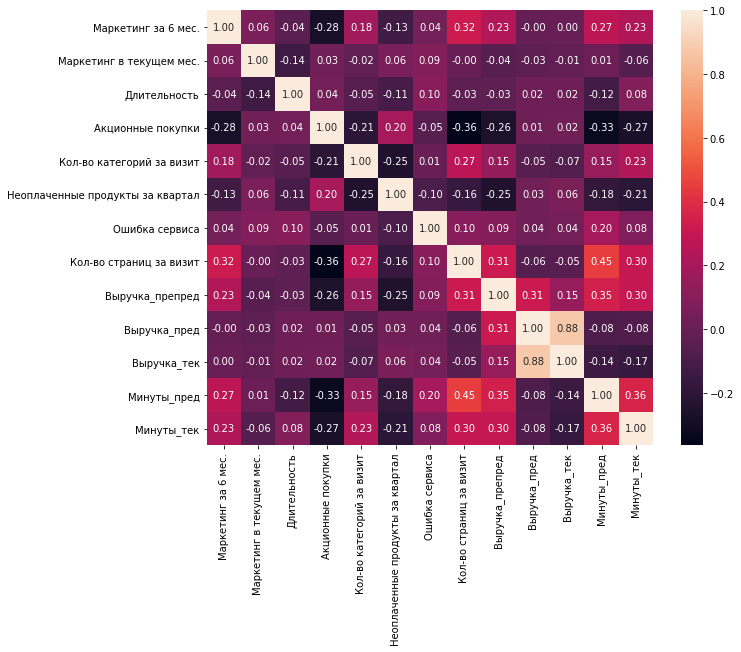

In [36]:
# построим матрицу корреляции
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f');

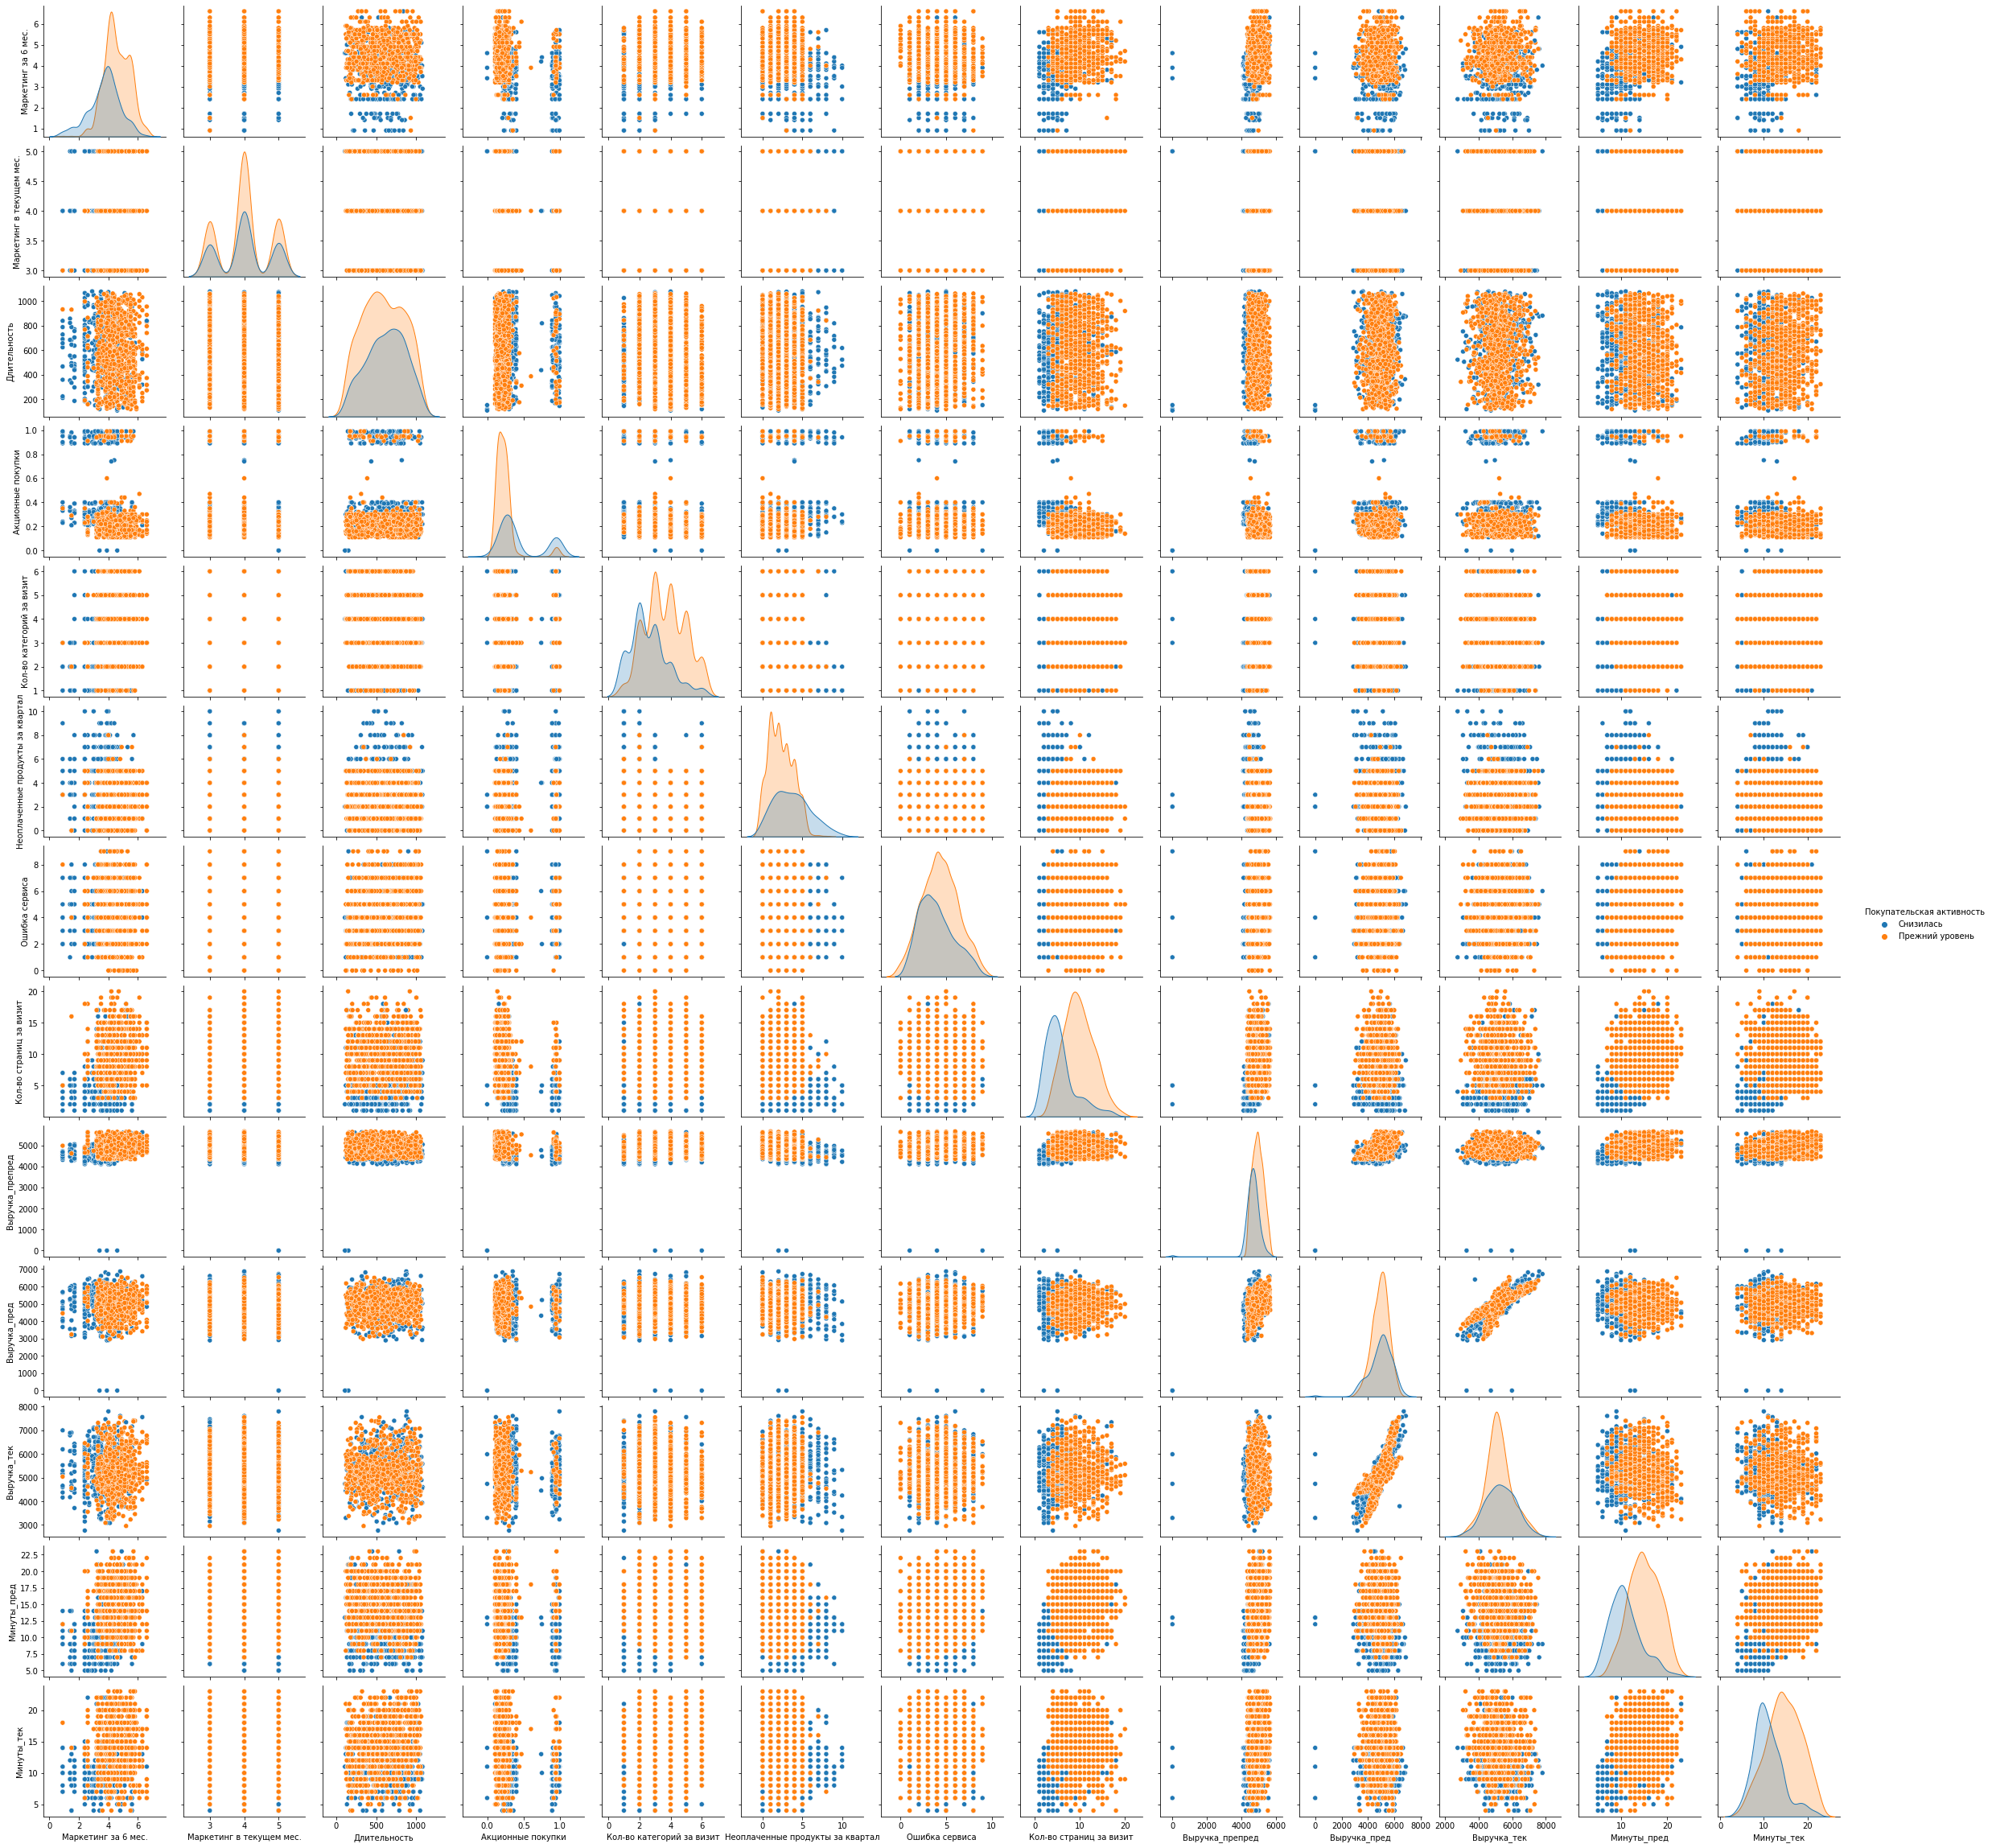

In [37]:
#построим график зависимостей для всех значений
sns.pairplot(df, hue='Покупательская активность')

plt.show()

**Вывод:** Построили матрицу корреляции и графики зависимостей всех значений. Мультиколлинеарность не наблюдается.

# 6. Использование паплайнов

Разделим данные на тестовые и тренировочные и создадим списки с названиями признаков

In [38]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Покупательская активность'], axis=1),
    encoder.fit_transform(df['Покупательская активность']),
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=df['Покупательская активность']
    
)

ohe_columns = ['Популярная категория', 'Разрешить сообщать']
ord_columns = ['Тип сервиса']
num_columns = ['Маркетинг за 6 мес.', 
               'Маркетинг в текущем мес.', 
               'Длительность', 'Акционные покупки', 
               'Кол-во категорий за визит', 'Неоплаченные продукты за квартал', 
               'Ошибка сервиса', 'Кол-во страниц за визит', 
               'Выручка_препред', 'Выручка_пред','Выручка_тек',
               'Минуты_пред', 'Минуты_тек']

X_train.shape, X_test.shape, y_train.shape, y_test.shape # данные распределлись равномерно

((975, 16), (325, 16), (975,), (325,))

Создадим паплайны

In [39]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Создадим итоговый пайплайн и обучим модели

In [40]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(5, 15),
        'models__max_features': range(5, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(5, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели SVC()
    {
        'models':[SVC(probability=True)],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [41]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Популярная категория',
                                                   'Разрешить сообщать']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                               

**Вывод:** Создали пайплан и нашли лучшую модель. Ей оказалась **SVC с качеством 0.92 и метрикой ROC-AUC 0.91**

# 7. Анализ важности признаков

Возьмем из предыдщего шага лучшую модель и построим график важности признаком методом **SHAP**.

In [42]:
best_pipeline = randomized_search.best_estimator_
preprocessor = best_pipeline.named_steps['preprocessor']


X_train_preprocessed = preprocessor.transform(X_train)

ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(input_features=ohe_columns)
ord_feature_names = ord_columns
num_feature_names = num_columns
all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

X_train_new = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)

  0%|          | 0/20 [00:00<?, ?it/s]

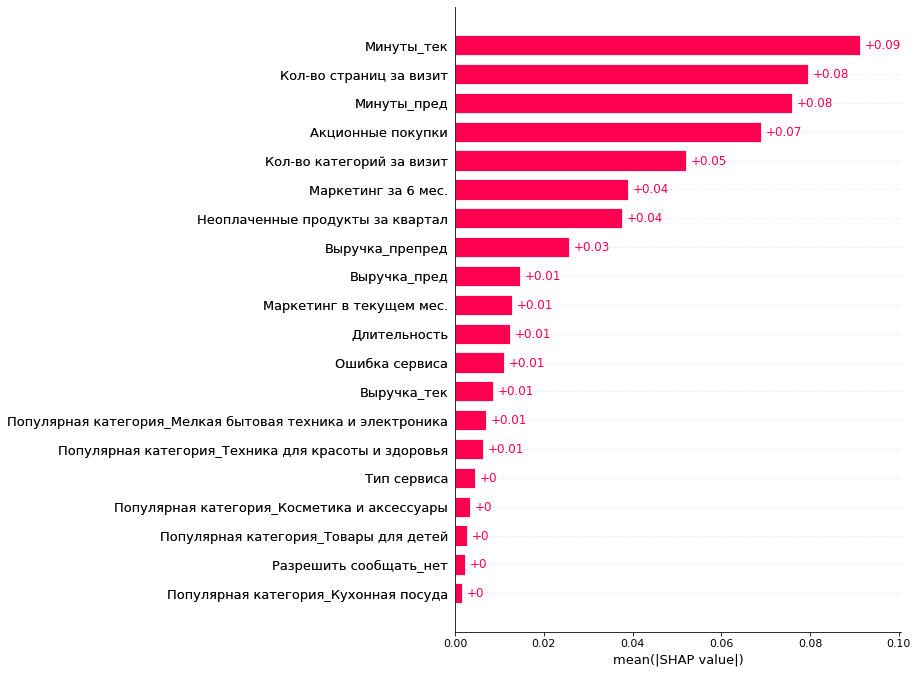

In [43]:
best_model = best_pipeline.named_steps['models']

explainer = shap.KernelExplainer(best_model.predict_proba, X_train_new[:20])
shap_values = explainer(X_train_new[:20])


shap.plots.bar(shap_values[:,:,1], max_display=20)

**Вывод:** Самые важные признаки для целевого признака оказались: **минуты на сайте текущего месяца, количество страниц за визит, минуты на сайте предыдущего месяца, доля акционных покупок и количество просмотренных категорий за визит**.

# 8. Сегментация покупателей

Добавим вероятности принадлжености к классу и объеденим все столбцы

In [44]:
y_train_proba = randomized_search.predict_proba(X_train)[:,1]
y_test_proba = randomized_search.predict_proba(X_test)[:,1]

In [45]:
X_train['Вероятность снижения'] = y_train_proba
X_test['Вероятность снижения'] = y_test_proba

df_new = pd.concat([X_train, X_test])

In [46]:
df_money = df_money.set_index('id')
df_new = df_new.join(df_money)

df_new.head()

Тип сервиса Разрешить сообщать  Маркетинг за 6 мес.  \
id                                                           
215535    стандарт                нет                  2.6   
216167    стандарт                нет                  4.4   
216241     премиум                 да                  6.1   
215696     премиум                 да                  3.4   
216417     премиум                 да                  4.6   

        Маркетинг в текущем мес.  Длительность  Акционные покупки  \
id                                                                  
215535                         3           302               0.31   
216167                         5           791               0.24   
216241                         3           668               0.17   
215696                         3           384               0.98   
216417                         3           485               0.23   

                        Популярная категория  Кол-во категорий за визит  \
id                                                                        
215535                      Товары для детей                          2   
216167                       Кухонная посуда                          3   
216241                     Домашний текстиль                          6   
215696                       Кухонная посуда                          1   
216417  Мелкая бытовая техника и электроника                          2   

        Неоплаченные продукты за квартал  Ошибка сервиса  \
id                                                         
215535                                 1               1   
216167                                 1               4   
216241                                 4               4   
215696                                 9               4   
216417                                 5               7   

        Кол-во страниц за визит  Выручка_препред  Выручка_пред  Выручка_тек  \
id                                                                            
215535                        7           4586.0        4430.0       4667.9   
216167                        8           4555.0        5132.5       5763.0   
216241                       14           5014.0        5159.5       5415.6   
215696                        3           4779.0        5728.5       6457.8   
216417                       13           4486.0        4163.5       4014.0   

        Минуты_пред  Минуты_тек  Вероятность снижения  Прибыль  
id                                                              
215535            7           9              0.937203     2.80  
216167           12          20              0.079861     4.36  
216241           10          11              0.030231     3.91  
215696           16          11              0.937247     2.88  
216417           20          11              0.102708     6.40

Проверили данные, все необходимое добавилось.

Возьмем первые 5 признаков по важности для и наложим на график прибыльности и вероятности снижения актиавности. Найдем закономерности.

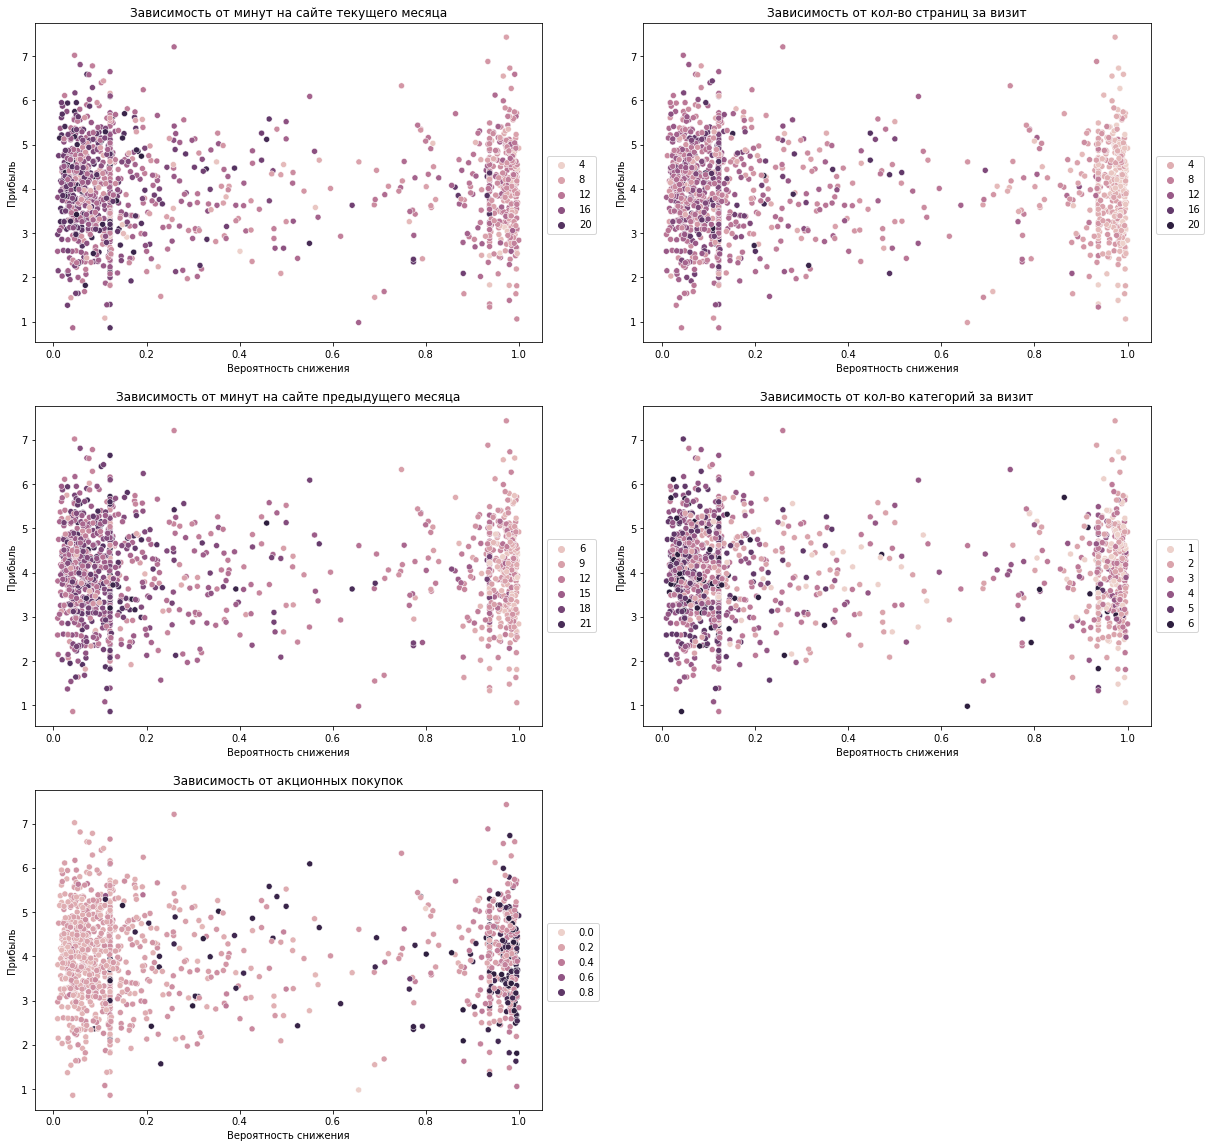

In [47]:
fig,axes = plt.subplots(3, 2, figsize=(20, 20))

sns.scatterplot(data=df_new, x='Вероятность снижения', y='Прибыль', hue='Минуты_тек', ax=axes[0, 0])
axes[0, 0].set_title('Зависимость от минут на сайте текущего месяца')
axes[0, 0].legend(bbox_to_anchor=(1, 0.6))

sns.scatterplot(data=df_new, x='Вероятность снижения', y='Прибыль', hue='Кол-во страниц за визит', ax=axes[0, 1])
axes[0, 1].set_title('Зависимость от кол-во страниц за визит')
axes[0, 1].legend(bbox_to_anchor=(1, 0.6))

sns.scatterplot(data=df_new, x='Вероятность снижения', y='Прибыль', hue='Минуты_пред', ax=axes[1, 0])
axes[1, 0].set_title('Зависимость от минут на сайте предыдущего месяца')
axes[1, 0].legend(bbox_to_anchor=(1, 0.6))

sns.scatterplot(data=df_new, x='Вероятность снижения', y='Прибыль', hue='Кол-во категорий за визит', ax=axes[1, 1])
axes[1, 1].set_title('Зависимость от кол-во категорий за визит')
axes[1, 1].legend(bbox_to_anchor=(1, 0.6))

sns.scatterplot(data=df_new, x='Вероятность снижения', y='Прибыль', hue='Акционные покупки', ax=axes[2, 0])
axes[2, 0].set_title('Зависимость от акционных покупок')
axes[2, 0].legend(bbox_to_anchor=(1, 0.6))

fig.delaxes(axes[2, 1])

По графикам видно что:
1. Покупатели, которые долго остаются на сайте как в прошлом так и в текущем месяце, намного меньше подвержены снижению общей покупательской активностью;
2. Это же утверждение относится и к посещениям категорий на сайте. Чем больше категорий смотрит покупатель, тем меньше у него вероятность снижения покупательской активности;
3. Чем больше покупатель просматривает страниц на сайте, тем меньше у него вероятность снижения покупательской активности;
4. По графику видно, что люди, берущие товары по акции, с большей вероястностью начинают проявлять меньшую покупательскую активность.

**Сегментируем данные по людям, которые берут товары по акции и проанализируем эти данные с помощью графиков**

Возьмем сегмент пользователей которые берут более 50 % товаров по акции и разделим их на тех у которых более 80% вероятность снижения активности и на тех у которых вероятность снижения активности меньше 20%. И сравним их

In [48]:
df_no_active = df_new[df_new['Акционные покупки'] > 0.5]
df_active = df_no_active[df_no_active['Вероятность снижения'] < 0.2]
df_no_active = df_no_active[df_no_active['Вероятность снижения'] > 0.8]

**Графики взаимодействия пользователя с сайтом**

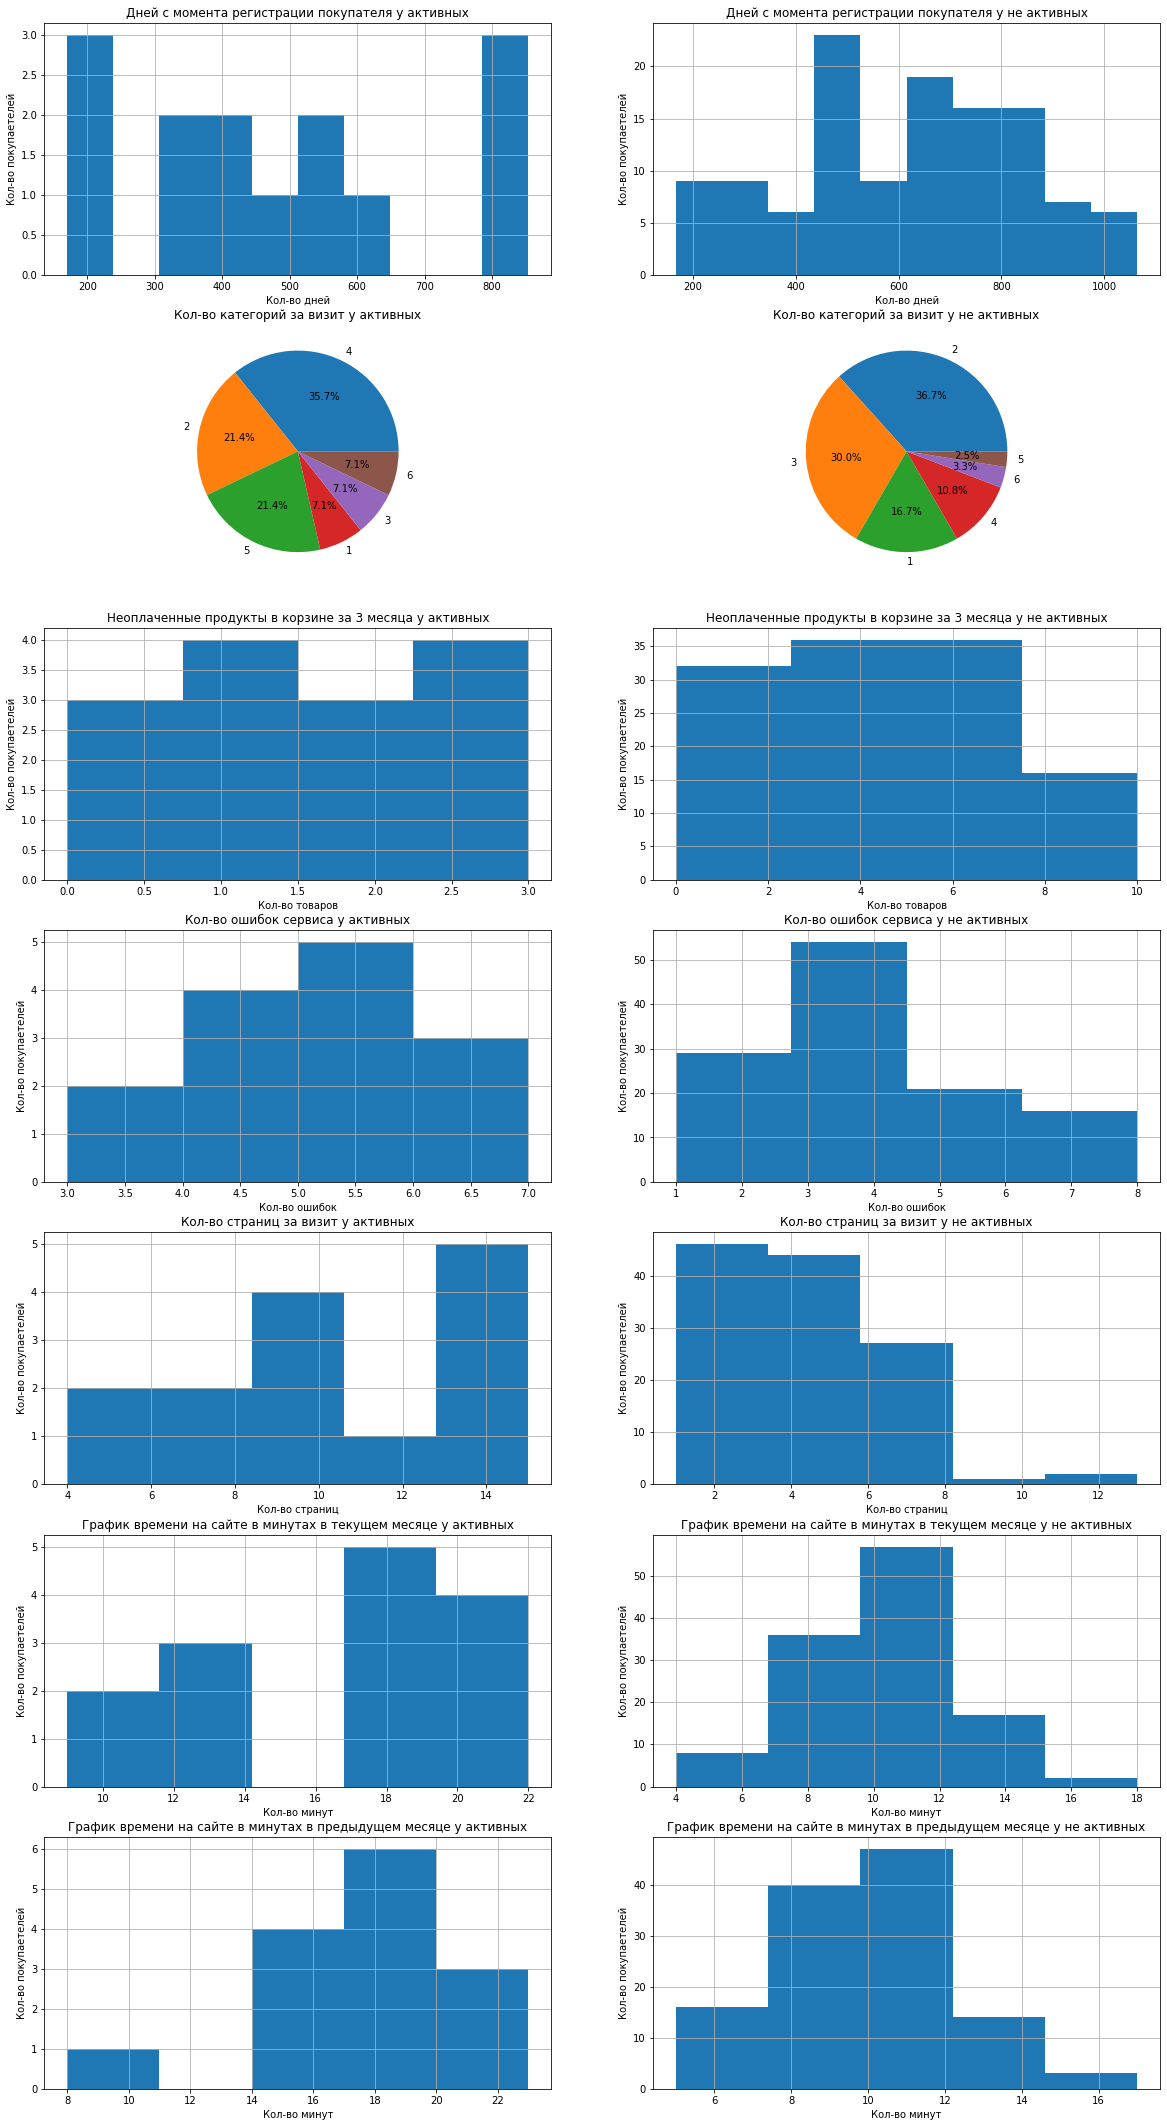

In [49]:
fig, axs = plt.subplots(7, 2, figsize=(20, 38))

df_active['Длительность'].hist(bins=10, ax=axs[0, 0])
axs[0, 0].set_title('Дней с момента регистрации покупателя у активных')
axs[0, 0].set_xlabel('Кол-во дней')
axs[0, 0].set_ylabel('Кол-во покупаетелей')

df_no_active['Длительность'].hist(bins=10, ax=axs[0, 1])
axs[0, 1].set_title('Дней с момента регистрации покупателя у не активных')
axs[0, 1].set_xlabel('Кол-во дней')
axs[0, 1].set_ylabel('Кол-во покупаетелей')

category_count_1 = df_active['Кол-во категорий за визит'].value_counts()
axs[1, 0].pie(category_count_1, labels=category_count_1.index, autopct='%1.1f%%')
axs[1, 0].set_title('Кол-во категорий за визит у активных')

category_count_2 = df_no_active['Кол-во категорий за визит'].value_counts()
axs[1, 1].pie(category_count_2, labels=category_count_2.index, autopct='%1.1f%%')
axs[1, 1].set_title('Кол-во категорий за визит у не активных')

df_active['Неоплаченные продукты за квартал'].hist(bins=4, ax=axs[2, 0])
axs[2, 0].set_title('Неоплаченные продукты в корзине за 3 месяца у активных')
axs[2, 0].set_xlabel('Кол-во товаров')
axs[2, 0].set_ylabel('Кол-во покупаетелей')

df_no_active['Неоплаченные продукты за квартал'].hist(bins=4, ax=axs[2, 1])
axs[2, 1].set_title('Неоплаченные продукты в корзине за 3 месяца у не активных')
axs[2, 1].set_xlabel('Кол-во товаров')
axs[2, 1].set_ylabel('Кол-во покупаетелей')

df_active['Ошибка сервиса'].hist(bins=4, ax=axs[3, 0])
axs[3, 0].set_title('Кол-во ошибок сервиса у активных')
axs[3, 0].set_xlabel('Кол-во ошибок')
axs[3, 0].set_ylabel('Кол-во покупаетелей')

df_no_active['Ошибка сервиса'].hist(bins=4, ax=axs[3, 1])
axs[3, 1].set_title('Кол-во ошибок сервиса у не активных')
axs[3, 1].set_xlabel('Кол-во ошибок')
axs[3, 1].set_ylabel('Кол-во покупаетелей')

df_active['Кол-во страниц за визит'].hist(bins=5, ax=axs[4, 0])
axs[4, 0].set_title('Кол-во страниц за визит у активных')
axs[4, 0].set_xlabel('Кол-во страниц')
axs[4, 0].set_ylabel('Кол-во покупаетелей')

df_no_active['Кол-во страниц за визит'].hist(bins=5, ax=axs[4, 1])
axs[4, 1].set_title('Кол-во страниц за визит у не активных')
axs[4, 1].set_xlabel('Кол-во страниц')
axs[4, 1].set_ylabel('Кол-во покупаетелей')

df_active['Минуты_тек'].hist(bins=5, ax=axs[5, 0])
axs[5, 0].set_title('График времени на сайте в минутах в текущем месяце у активных')
axs[5, 0].set_xlabel('Кол-во минут')
axs[5, 0].set_ylabel('Кол-во покупаетелей')

df_no_active['Минуты_тек'].hist(bins=5, ax=axs[5, 1])
axs[5, 1].set_title('График времени на сайте в минутах в текущем месяце у не активных')
axs[5, 1].set_xlabel('Кол-во минут')
axs[5, 1].set_ylabel('Кол-во покупаетелей')

df_active['Минуты_пред'].hist(bins=5, ax=axs[6, 0])
axs[6, 0].set_title('График времени на сайте в минутах в предыдущем месяце у активных')
axs[6, 0].set_xlabel('Кол-во минут')
axs[6, 0].set_ylabel('Кол-во покупаетелей')

df_no_active['Минуты_пред'].hist(bins=5, ax=axs[6, 1])
axs[6, 1].set_title('График времени на сайте в минутах в предыдущем месяце у не активных')
axs[6, 1].set_xlabel('Кол-во минут')
axs[6, 1].set_ylabel('Кол-во покупаетелей')

plt.show()

По графикам взаимодействия покупателя с сайтом видно, что:
1. Самый частый показатель дней регистриации у активных покупателей находится **около 200 и 800 и дней**. А у покупателей с большой долей снижения активности около **500 дней и с максимальным значением более 1000 дней**;
2. Количество просматриваемых кактегорий у активных пользователей самый частый показатель находится на **4, 2 и 5** категориях, а у не активных на **2, 3 и 1 категориях**;
3. У активных пользователей неоплаченные товары в корзине в целом **не превышает 3**, а у не активных в целом достигает **10 заказов**;
4. У обоих категорий пользователей наблюдаются ошибки в с работе с сайтом, у не активных они могут достигать **до 8 ошибок**;
5. Активные пользователи чаще просматривают разные старницы сайта с самым частым **просмотров 9 и 14 страниц**, а самое большое количество доходит **до 15**. У не активных пользователей наблюдается просмотр страниц **от 2 до 6, а самое большее число страниц не превышает 13**;
6. Активные пользователи тратят на сайт чаще всего **около 17 и 19 минут**, с самым долгим посещением **23 минуты и наименьшим около 8 минут**. Не активные пользователи Чаще всего тратят **8 и 12 минут** на сайт, с самым долгим посещением **18 минут и самым меньшем - 4 минуты**.

Общее наблюдение: покупатели, у которых с большой долей вероятности снижается покупательская активность меньше проводят времени на сайте и используют его, а так же наблюдается снижение активности в завимисоти от того, как давно зарегистрировался покупатель на сайте.

**Графики продуктового поведения покупателей**

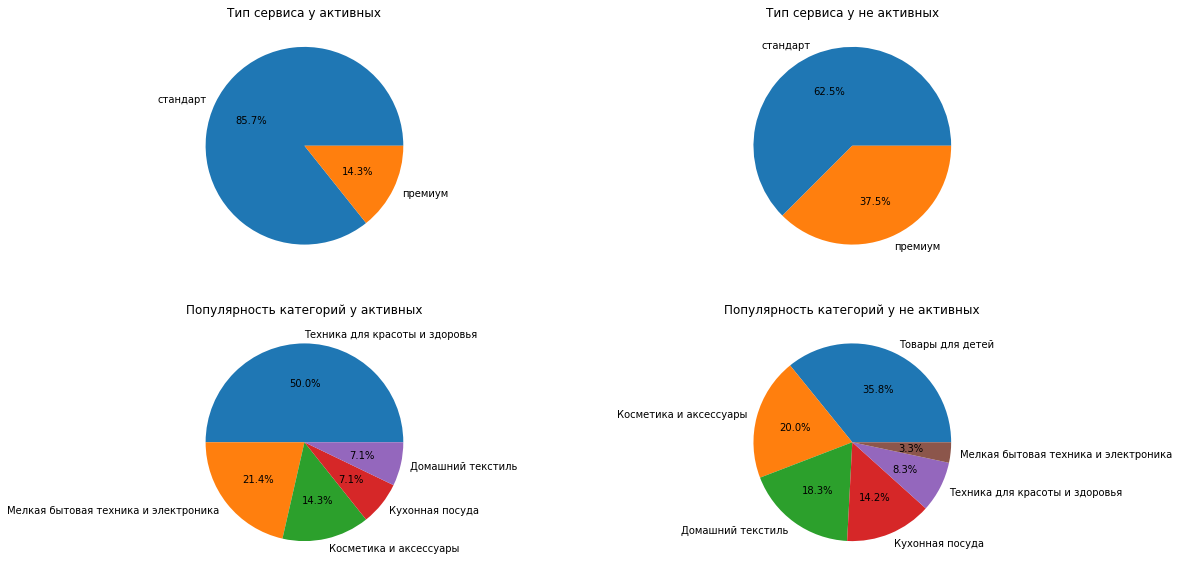

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

type_count_1 = df_active['Тип сервиса'].value_counts()
axs[0, 0].pie(type_count_1, labels=type_count_1.index, autopct='%1.1f%%')
axs[0, 0].set_title('Тип сервиса у активных')

type_count_2 = df_no_active['Тип сервиса'].value_counts()
axs[0, 1].pie(type_count_2, labels=type_count_2.index, autopct='%1.1f%%')
axs[0, 1].set_title('Тип сервиса у не активных')

popular_count_1 = df_active['Популярная категория'].value_counts()
axs[1, 0].pie(popular_count_1, labels=popular_count_1.index, autopct='%1.1f%%')
axs[1, 0].set_title('Популярность категорий у активных')

popular_count_2 = df_no_active['Популярная категория'].value_counts()
axs[1, 1].pie(popular_count_2, labels=popular_count_2.index, autopct='%1.1f%%')
axs[1, 1].set_title('Популярность категорий у не активных')

plt.show()

По графикам продуктового поведения покупателей видно, что:
1. У активных покупателей преобладающее число типов сервисов имеет значение стандарт 85,7%, а премиум всего 14,3%. У покупаетелей, которые с большой доли вероятности активность снизится тип сервиса стандарт имеет соотношение 62,5%, а премиум - 37,5%
2. Самые популярные катеогории у активных пользователей это **Техника для красоты и здоровья**, **Мелкая бытовая техника** и **Косметика и аксессуары*. У не активных пользователь на первом месте **Товары для детей**, на втором **Косметика и аксессуары**, а н третьем **Домашний текстиль**.

Общее наблюдение: покупатели у которых большая доля снижения активности большее количество типов сервиса премиум. А любимая категория это **Товары для детей**.

**Графики комммуникации с покупателями**

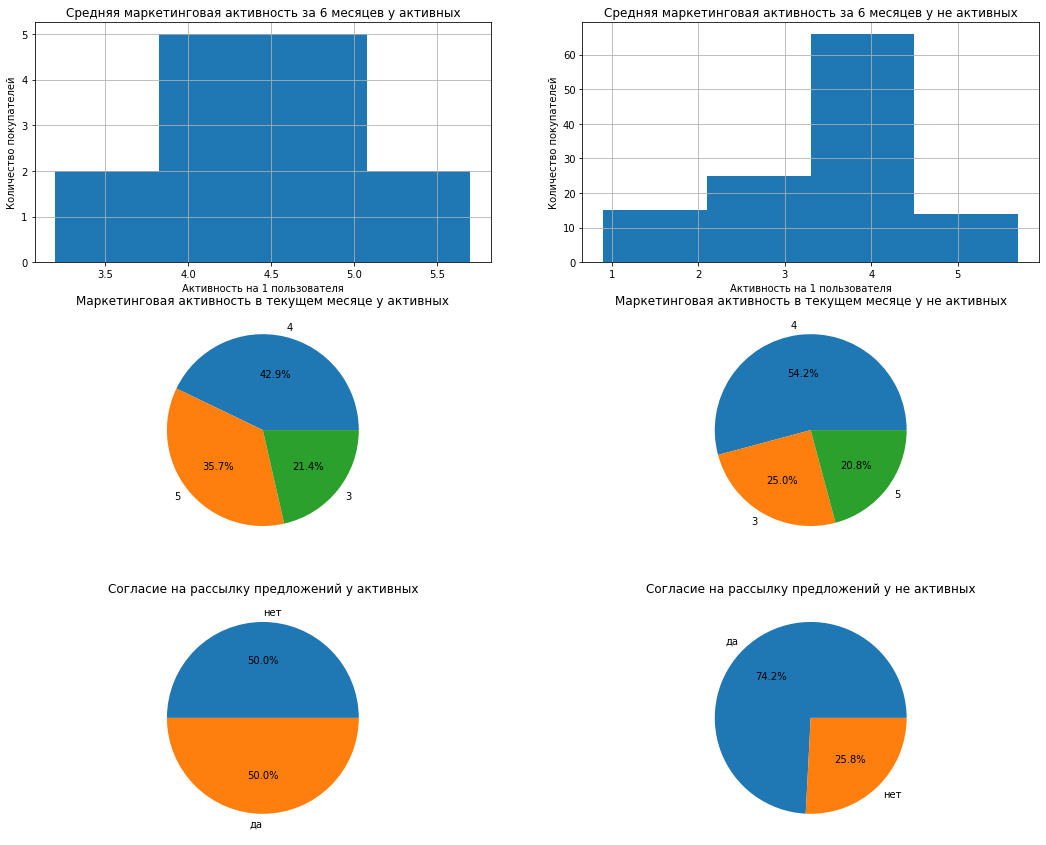

In [51]:
fig, axs = plt.subplots(3, 2, figsize=(18, 15))

df_active['Маркетинг за 6 мес.'].hist(bins=4, ax=axs[0, 0])
axs[0, 0].set_title('Средняя маркетинговая активность за 6 месяцев у активных')
axs[0, 0].set_xlabel('Активность на 1 пользователя')
axs[0, 0].set_ylabel('Количество покупателей')

df_no_active['Маркетинг за 6 мес.'].hist(bins=4, ax=axs[0, 1])
axs[0, 1].set_title('Средняя маркетинговая активность за 6 месяцев у не активных')
axs[0, 1].set_xlabel('Активность на 1 пользователя')
axs[0, 1].set_ylabel('Количество покупателей')

marketing_count_1 = df_active['Маркетинг в текущем мес.'].value_counts()
axs[1, 0].pie(marketing_count_1, labels=marketing_count_1.index, autopct='%1.1f%%')
axs[1, 0].set_title('Маркетинговая активность в текущем месяце у активных')

marketing_count_2 = df_no_active['Маркетинг в текущем мес.'].value_counts()
axs[1, 1].pie(marketing_count_2, labels=marketing_count_2.index, autopct='%1.1f%%')
axs[1, 1].set_title('Маркетинговая активность в текущем месяце у не активных')

agree_count_1 = df_active['Разрешить сообщать'].value_counts()
axs[2, 0].pie(agree_count_1, labels=agree_count_1.index, autopct='%1.1f%%')
axs[2, 0].set_title('Согласие на рассылку предложений у активных')

agree_count_2 = df_no_active['Разрешить сообщать'].value_counts()
axs[2, 1].pie(agree_count_2, labels=agree_count_2.index, autopct='%1.1f%%')
axs[2, 1].set_title('Согласие на рассылку предложений у не активных')

plt.show()

По графикам коммуникации с покупателями видно, что:
1. Активные пользователи чаще всего получали маркетинговую активность за 6 месяцев от **4 до 5 раз**, а не активные пользователи около **4**;
2. У активных покупателей маркетинговая активность в текущем месяце чаще всего наблюдается **4 активности (42,9%) и немного меньше 5 (35,7%)**, у не активных покупателей преобладающее число активностей составляет **4 (54,2%)**;
3. Только **50%%** активных покупателей дают согласие на рассылку предложений, а не активные покупатели чаще дают согласие на рассылку предложений - **74,2%%**.

Общее наблюдение: не активные пользователи дают чаще согласия на отправку предложений от компании, при этом получают немного больше предложений за текущий месяц, а за предыдущие месяца они получили меньше предложений.

**Графики выручки и прибыльности**

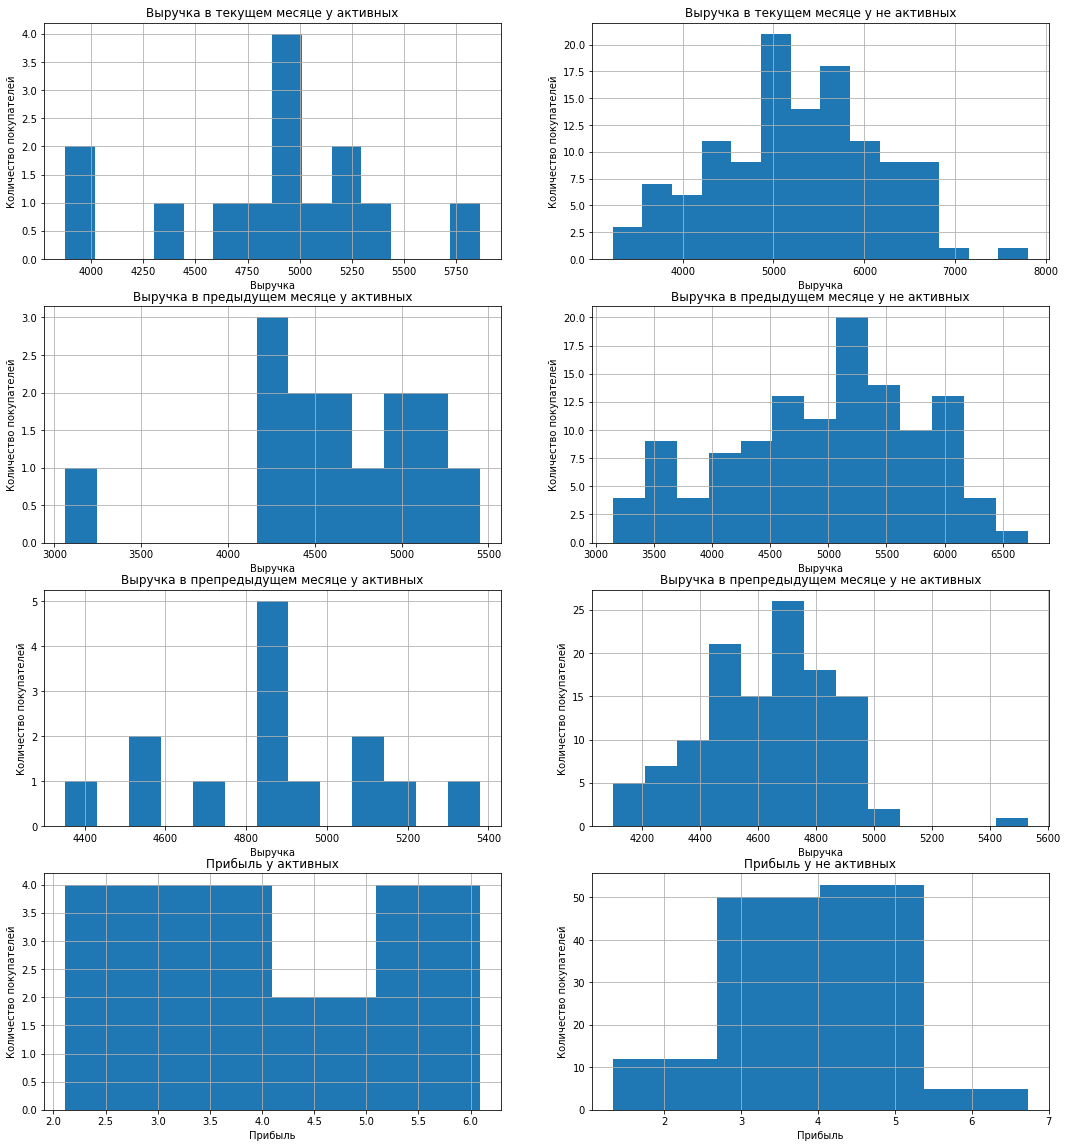

In [52]:
fig, axs = plt.subplots(4, 2, figsize=(18, 20))

df_active['Выручка_тек'].hist(bins=14, ax=axs[0, 0])
axs[0, 0].set_title('Выручка в текущем месяце у активных')
axs[0, 0].set_xlabel('Выручка')
axs[0, 0].set_ylabel('Количество покупателей')

df_no_active['Выручка_тек'].hist(bins=14, ax=axs[0, 1])
axs[0, 1].set_title('Выручка в текущем месяце у не активных')
axs[0, 1].set_xlabel('Выручка')
axs[0, 1].set_ylabel('Количество покупателей')

df_active['Выручка_пред'].hist(bins=13, ax=axs[1, 0])
axs[1, 0].set_title('Выручка в предыдущем месяце у активных')
axs[1, 0].set_xlabel('Выручка')
axs[1, 0].set_ylabel('Количество покупателей')

df_no_active['Выручка_пред'].hist(bins=13, ax=axs[1, 1])
axs[1, 1].set_title('Выручка в предыдущем месяце у не активных')
axs[1, 1].set_xlabel('Выручка')
axs[1, 1].set_ylabel('Количество покупателей')

df_active['Выручка_препред'].hist(bins=13, ax=axs[2, 0])
axs[2, 0].set_title('Выручка в препредыдущем месяце у активных')
axs[2, 0].set_xlabel('Выручка')
axs[2, 0].set_ylabel('Количество покупателей')

df_no_active['Выручка_препред'].hist(bins=13, ax=axs[2, 1])
axs[2, 1].set_title('Выручка в препредыдущем месяце у не активных')
axs[2, 1].set_xlabel('Выручка')
axs[2, 1].set_ylabel('Количество покупателей')

df_active['Прибыль'].hist(bins=4, ax=axs[3, 0])
axs[3, 0].set_title('Прибыль у активных')
axs[3, 0].set_xlabel('Прибыль')
axs[3, 0].set_ylabel('Количество покупателей')

df_no_active['Прибыль'].hist(bins=4, ax=axs[3, 1])
axs[3, 1].set_title('Прибыль у не активных')
axs[3, 1].set_xlabel('Прибыль')
axs[3, 1].set_ylabel('Количество покупателей')

plt.show()

По графикам выручки и прибыльности видно, что:
1. Активные покупатели чаще всего делают выручку в текущем месяце **около 5000**, а не активные пользователи **от 5000 до 5500**. При этом не активные покупатели покупают на сумму от **3000 до 4000**, а активные **от 4000**, но не активные делают покупки не частые покупки свыше **7000**, а активные нет.
2. Выручка в предыдущем месяце у активных чаще всего делали **около 4250** и не превышало **5500**. А у не активных чаще всего **5250** и доходит до **6500**
3. Выручка в предпредыдущем месяце у активных чаще всего около **4900**, а у не активных **4700**.
4. Прибыль по активные покупателям самым частым значением имеет **от 2 до 4 и от 5 до 6**, а не активные пользователи **от 3 до 5**.

Общее наблюдение: активные покупатели чаще генерируют чуть больше выручки, чем не активные, хотя у не активных есть редкие крупные заказы. При это прибыль генерируют больше активные пользователи.

**Предложения по работе сервиса:** Из проведенного анализа можно сделать вывод, что для того чтобы уменьшить количество снижения покупательской активности, нужно более внимательно отнестись к покуапетелям, которые используют акционные предложения, особенно в категории **Товары для детей**. Как показал нам анализ, это люди которые давно зарегистрированы на сайте, а значит их дети начинают расти и даже увеличивая макетинговую активность по этой категории товаров, она не будет так же хорошо работать как раньше, так как пропадает необходимость в этих товарах. Поэтому нужно удерживать этих покупателей и переориентировать на другие товары, улучшая их взаимодейсвтие с сайтом, чтобы они как можно дольше находились на нем.

**Вывод**: Мы взяли первые 5 признаков по важности для и наложили на график прибыльности и вероятности снижения актиавности.

По графикам видно что:
1. Покупатели, которые долго остаются на сайте как в прошлом так и в текущем месяце, намного меньше подвержены снижению общей покупательской активностью;
2. Это же утверждение относится и к посещениям категорий на сайте. Чем больше категорий смотрит покупатель, тем меньше у него вероятность снижения покупательской активности;
3. Чем больше покупатель просматривает страниц на сайте, тем меньше у него вероятность снижения покупательской активности;
4. По графику видно, что люди, берущие товары по акции, с большей вероястностью начинают проявлять меньшую покупательскую активность.


По графикам взаимодействия покупателя с сайтом видно, что:
1. Самый частый показатель дней регистриации у активных покупателей находится **около 200 и 800 и дней**. А у покупателей с большой долей снижения активности около **500 дней и с максимальным значением более 1000 дней**;
2. Количество просматриваемых кактегорий у активных пользователей самый частый показатель находится на **4, 2 и 5** категориях, а у не активных на **2, 3 и 1 категориях**;
3. У активных пользователей неоплаченные товары в корзине в целом **не превышает 3**, а у не активных в целом достигает **10 заказов**;
4. У обоих категорий пользователей наблюдаются ошибки в с работе с сайтом, у не активных они могут достигать **до 8 ошибок**;
5. Активные пользователи чаще просматривают разные старницы сайта с самым частым **просмотров 9 и 14 страниц**, а самое большое количество доходит **до 15**. У не активных пользователей наблюдается просмотр страниц **от 2 до 6, а самое большее число страниц не превышает 13**;
6. Активные пользователи тратят на сайт чаще всего **около 17 и 19 минут**, с самым долгим посещением **23 минуты и наименьшим около 8 минут**. Не активные пользователи Чаще всего тратят **8 и 12 минут** на сайт, с самым долгим посещением **18 минут и самым меньшем - 4 минуты**.

**Общее наблюдение:** покупатели, у которых с большой долей вероятности снижается покупательская активность меньше проводят времени на сайте и используют его, а так же наблюдается снижение активности в завимисоти от того, как давно зарегистрировался покупатель на сайте.

По графикам продуктового поведения покупателей видно, что:
1. У активных покупателей преобладающее число типов сервисов имеет значение стандарт 85,7%, а премиум всего 14,3%. У покупаетелей, которые с большой доли вероятности активность снизится тип сервиса стандарт имеет соотношение 62,5%, а премиум - 37,5%
2. Самые популярные катеогории у активных пользователей это **Техника для красоты и здоровья**, **Мелкая бытовая техника** и **Косметика и аксессуары*. У не активных пользователь на первом месте **Товары для детей**, на втором **Косметика и аксессуары**, а н третьем **Домашний текстиль**.

**Общее наблюдение:** покупатели у которых большая доля снижения активности большее количество типов сервиса премиум. А любимая категория это **Товары для детей**.

По графикам коммуникации с покупателями видно, что:
1. Активные пользователи чаще всего получали маркетинговую активность за 6 месяцев от **4 до 5 раз**, а не активные пользователи около **4**;
2. У активных покупателей маркетинговая активность в текущем месяце чаще всего наблюдается **4 активности (42,9%) и немного меньше 5 (35,7%)**, у не активных покупателей преобладающее число активностей составляет **4 (54,2%)**;
3. Только **50%%** активных покупателей дают согласие на рассылку предложений, а не активные покупатели чаще дают согласие на рассылку предложений - **74,2%%**.

**Общее наблюдение:** не активные пользователи дают чаще согласия на отправку предложений от компании, при этом получают немного больше предложений за текущий месяц, а за предыдущие месяца они получили меньше предложений.

По графикам выручки и прибыльности видно, что:
1. Активные покупатели чаще всего делают выручку в текущем месяце **около 5000**, а не активные пользователи **от 5000 до 5500**. При этом не активные покупатели покупают на сумму от **3000 до 4000**, а активные **от 4000**, но не активные делают покупки не частые покупки свыше **7000**, а активные нет.
2. Выручка в предыдущем месяце у активных чаще всего делали **около 4250** и не превышало **5500**. А у не активных чаще всего **5250** и доходит до **6500**
3. Выручка в предпредыдущем месяце у активных чаще всего около **4900**, а у не активных **4700**.
4. Прибыль по активные покупателям самым частым значением имеет **от 2 до 4 и от 5 до 6**, а не активные пользователи **от 3 до 5**.

**Общее наблюдение:** активные покупатели чаще генерируют чуть больше выручки, чем не активные, хотя у не активных есть редкие крупные заказы. При это прибыль генерируют больше активные пользователи.

**Предложения по работе сервиса:** Из проведенного анализа можно сделать вывод, что для того чтобы уменьшить количество снижения покупательской активности, нужно более внимательно отнестись к покуапетелям, которые используют акционные предложения, особенно в категории **Товары для детей**. Как показал нам анализ, это люди которые давно зарегистрированы на сайте, а значит их дети начинают расти и даже увеличивая макетинговую активность по этой категории товаров, она не будет так же хорошо работать как раньше, так как пропадает необходимость в этих товарах. Поэтому нужно удерживать этих покупателей и переориентировать на другие товары, улучшая их взаимодейсвтие с сайтом, чтобы они как можно дольше находились на нем.

# 9. Общий вывод

Мы загрузили данные из четырех файлов. Просомтрели их и исправили в файле **money** запись данных. Так же можно заметить, что данные в **market_money, time и money** находятся данные, которые имеют шаг в 1300. Скорее всего это данные о 1300 покупателей, которые в имеются в одном файле данные за 2 месяца, в другом за 3.

Проверили данные на наличие дубликатов и корректность написания информации. Дубликатов не обнаружено, но нашлись опечатки в данных. Исправиили их и сделали запись данных более лаконичными.

**После построения графиков взаимодействия пользователей с сайтом мы заметили, что:**
1. Снижение активность отслеживается у **38,3% покупателей**;
2. Самое большое количество покуаетлей, которые зарегистрировались на сайте примерно **600 дней** назад;
3. Набольшие кол-во категорий просматриваемых на сайте - **3 страницы (27,4%), 2 страницы (24%) и 4 страницы (20,2%)**;
4. Неоплаченные продукты в корзине за 3 месяца в среднем **около 3**;
5. Кол-во оишбок сервиса, с которым сталкивается полкупатель чаще всего **около 4**;
6. Покупатели чаще всего просматривает около **6 страниц за визит**.


**После построения графиков продуктового поведения покупателей мы заметили, что:**
1. Покупателей с подпиской **стандарт - 71,1%**, а с подпиской **премиум - 28,9%**;
2. Самое большое колчиество покупаетелей покупающие акционные продукты **около 20-30%**;
3. Самая попоулярная категория товаров - **Товары для детей (25,4%), Домашний текстиль (19,3%), Косметика и аксессуары (17,2%)**.

**После построения графиков комммуникации с покупателями мы заметили, что:**
1. За последние 3 месяца, чаще всего маркетинговые активности делали **4 раза на 1 пользователя**;
2. Макретинговая активность за текущий месяц составляет также **4 раза у 51,5% пользователей**;
3. Согласие на рассылку предложений дали **74% пользователей**.

Помимо этого, устранили выброс в данных по Выручке.

Объеденили данные из 3 файлов df_market, df_m_money, df_time в один файл.

Построили матрицу корреляции и графики зависимостей всех значений. Мультиколлинеарность не наблюдается.

Самые важные признаки для целевого признака оказались: **минуты на сайте текущего месяца, количество страниц за визит, минуты на сайте предыдущего месяца, доля акционных покупок и количество просмотренных категорий за визит**.



 Мы взяли первые 5 признаков по важности для и наложили на график прибыльности и вероятности снижения актиавности.

По графикам видно что:
1. Покупатели, которые долго остаются на сайте как в прошлом так и в текущем месяце, намного меньше подвержены снижению общей покупательской активностью;
2. Это же утверждение относится и к посещениям категорий на сайте. Чем больше категорий смотрит покупатель, тем меньше у него вероятность снижения покупательской активности;
3. Чем больше покупатель просматривает страниц на сайте, тем меньше у него вероятность снижения покупательской активности;
4. По графику видно, что люди, берущие товары по акции, с большей вероястностью начинают проявлять меньшую покупательскую активность.


По графикам взаимодействия покупателя с сайтом видно, что:
1. Самый частый показатель дней регистриации у активных покупателей находится **около 200 и 800 и дней**. А у покупателей с большой долей снижения активности около **500 дней и с максимальным значением более 1000 дней**;
2. Количество просматриваемых кактегорий у активных пользователей самый частый показатель находится на **4, 2 и 5** категориях, а у не активных на **2, 3 и 1 категориях**;
3. У активных пользователей неоплаченные товары в корзине в целом **не превышает 3**, а у не активных в целом достигает **10 заказов**;
4. У обоих категорий пользователей наблюдаются ошибки в с работе с сайтом, у не активных они могут достигать **до 8 ошибок**;
5. Активные пользователи чаще просматривают разные старницы сайта с самым частым **просмотров 9 и 14 страниц**, а самое большое количество доходит **до 15**. У не активных пользователей наблюдается просмотр страниц **от 2 до 6, а самое большее число страниц не превышает 13**;
6. Активные пользователи тратят на сайт чаще всего **около 17 и 19 минут**, с самым долгим посещением **23 минуты и наименьшим около 8 минут**. Не активные пользователи Чаще всего тратят **8 и 12 минут** на сайт, с самым долгим посещением **18 минут и самым меньшем - 4 минуты**.

**Общее наблюдение:** покупатели, у которых с большой долей вероятности снижается покупательская активность меньше проводят времени на сайте и используют его, а так же наблюдается снижение активности в завимисоти от того, как давно зарегистрировался покупатель на сайте.

По графикам продуктового поведения покупателей видно, что:
1. У активных покупателей преобладающее число типов сервисов имеет значение стандарт 85,7%, а премиум всего 14,3%. У покупаетелей, которые с большой доли вероятности активность снизится тип сервиса стандарт имеет соотношение 62,5%, а премиум - 37,5%
2. Самые популярные катеогории у активных пользователей это **Техника для красоты и здоровья**, **Мелкая бытовая техника** и **Косметика и аксессуары*. У не активных пользователь на первом месте **Товары для детей**, на втором **Косметика и аксессуары**, а н третьем **Домашний текстиль**.

**Общее наблюдение:** покупатели у которых большая доля снижения активности большее количество типов сервиса премиум. А любимая категория это **Товары для детей**.

По графикам коммуникации с покупателями видно, что:
1. Активные пользователи чаще всего получали маркетинговую активность за 6 месяцев от **4 до 5 раз**, а не активные пользователи около **4**;
2. У активных покупателей маркетинговая активность в текущем месяце чаще всего наблюдается **4 активности (42,9%) и немного меньше 5 (35,7%)**, у не активных покупателей преобладающее число активностей составляет **4 (54,2%)**;
3. Только **50%%** активных покупателей дают согласие на рассылку предложений, а не активные покупатели чаще дают согласие на рассылку предложений - **74,2%%**.

**Общее наблюдение:** не активные пользователи дают чаще согласия на отправку предложений от компании, при этом получают немного больше предложений за текущий месяц, а за предыдущие месяца они получили меньше предложений.

По графикам выручки и прибыльности видно, что:
1. Активные покупатели чаще всего делают выручку в текущем месяце **около 5000**, а не активные пользователи **от 5000 до 5500**. При этом не активные покупатели покупают на сумму от **3000 до 4000**, а активные **от 4000**, но не активные делают покупки не частые покупки свыше **7000**, а активные нет.
2. Выручка в предыдущем месяце у активных чаще всего делали **около 4250** и не превышало **5500**. А у не активных чаще всего **5250** и доходит до **6500**
3. Выручка в предпредыдущем месяце у активных чаще всего около **4900**, а у не активных **4700**.
4. Прибыль по активные покупателям самым частым значением имеет **от 2 до 4 и от 5 до 6**, а не активные пользователи **от 3 до 5**.

**Общее наблюдение:** активные покупатели чаще генерируют чуть больше выручки, чем не активные, хотя у не активных есть редкие крупные заказы. При это прибыль генерируют больше активные пользователи.

**Предложения по работе сервиса:** Из проведенного анализа можно сделать вывод, что для того чтобы уменьшить количество снижения покупательской активности, нужно более внимательно отнестись к покуапетелям, которые используют акционные предложения, особенно в категории **Товары для детей**. Как показал нам анализ, это люди которые давно зарегистрированы на сайте, а значит их дети начинают расти и даже увеличивая макетинговую активность по этой категории товаров, она не будет так же хорошо работать как раньше, так как пропадает необходимость в этих товарах. Поэтому нужно удерживать этих покупателей и переориентировать на другие товары, улучшая их взаимодейсвтие с сайтом, чтобы они как можно дольше находились на нем.